In [1]:
from revertingOnecell import *
import matplotlib.pyplot as plt 
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
import os 

ModuleNotFoundError: No module named 'revertingOnecell'

In [2]:
import numpy as np

## plotting all of the elevation and activity pdfs

In [2]:
import numpy as np

In [4]:
llist 

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [1]:
def iterfile(func,argpattern=None):
    """ iterate over all simulations and evaluate a func(S) over each. 
    func(S) should save its result. """
    files = sorted([f for f in os.listdir('../simulations/') if '.npy' in f and '2000000' not in f and f != 'k_6_output_100000_Ap.npy' and f!='var-array.npy' and f!='b-array.npy'])
    for f in files:
        print(f)
        S = np.load(os.path.join('..','simulations',f))  
        if argpattern:
            args=argpattern(f) # the arguments come from the filename
        else:
            args=None
        func(S,args)
        
def viewfunc(S,args):
    """ the function to view simulation results """
    title,save_fname=args
    n,m,t = np.array(S).T
    M,Cm = np.unique(m,return_counts=True)
    N,Cn = np.unique(n,return_counts=True)
    xarg = z(M)#/z1
    xmin = xarg.min() - (xarg.max()-xarg.min())*0.1
    xmax = xarg.max() + (xarg.max()-xarg.min())*0.1

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
    if title:
        fig.suptitle(title, fontsize=20)
    fig.set_size_inches(8,4)
    ax1.scatter(xarg,Cm/Cm.sum())
    ax1.set_xlabel('bed elevation (cm)',fontsize=16)
    ax2.scatter(N,Cn/Cn.sum(),color='purple')
    ax2.set_xlabel('particle activity (#)',fontsize=16)
    ax2.set_xlim(N.min()-0.1*(N.max()-N.min()),N.max()+0.1*(N.max()-N.min()))



    fig.show()
    if save_fname: 
        fig.savefig(save_fname)
    del n,m,t,M,Cm,N,Cn        
    
def titlefunc(f):
    #return '../figures/'+f[:-4]
    trial = f[0]
    number = int(f[2])-1
    bval = [50,250,500,1000,5000,10000,20000,50000,100000][number]
    return 'parameter set '+ trial + ' and elevation scale ' + str(bval)        

# this plots every result in a needlessly complex way... was good to write this anyway. 
iterfile(viewfunc, lambda f: (titlefunc(f), '../figures/'+f[:-4] ))

NameError: name 'os' is not defined

## study scaling of bed elevation variance 

In [379]:
files = sorted([f for f in os.listdir('../simulations/') if '.npy' in f and '2000000' not in f and f != 'k_6_output_100000_Ap.npy' and f!='var-array.npy' and f!='b-array.npy'])
# notice the last trial n9 is missing.
b = [50,250,500,1000,5000,10000,20000,50000,100000] # raw b values
barr = 5*b # b values correpsonding to each filename 
barr = barr[:-1] # last trial is missing
b = np.array(b)
bar = np.array(barr)

In [310]:
# get variance of m versus b for all trials 
var = []
for f in files: 
    trial = f[0]
    number = int(f[2])-1
    S = np.load('../simulations/'+f)
    m = S.T[1]
    var.append(m.var())
    del m,S 
barr = np.array(barr)
var = np.array(var)
np.save('../simulations/b-array',barr)
np.save('../simulations/var-array',var)

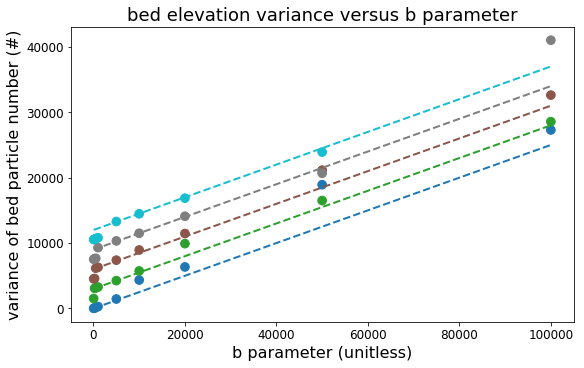

In [455]:
uni = np.unique(barr)
scales = np.where(uni.reshape(-1,1)==barr)[0] # scales to offset the data by to enhance visibility 
colors = [ord(f[0]) for f in files]
colors = np.array(colors)
colors = colors-colors.min()
colors = colors/colors.max()
plt.figure(figsize=(8,5),constrained_layout=True)
plt.scatter(barr, var+scales*1500, c=colors,cmap='tab10',marker='o',s=75)
#plt.scatter(barr/z1, (var+scales*1500)/z1**2, c=colors,cmap='tab10',marker='o',s=45)
cm = matplotlib.cm.get_cmap('tab10')
for i,sc in enumerate(np.unique(scales)[:5]):
    c = np.unique(colors)[i]
    plt.plot(b, b/4 + sc*1500*2, linestyle='dashed',
        linewidth=2,color=cm(c))

# place a text box in upper left in axes coords
textstr = 'words and words'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.xlabel('b parameter (unitless)',fontsize=16)
plt.ylabel('variance of bed particle number (#)',fontsize=16)
plt.title('bed elevation variance versus b parameter',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('../figures/unscaled_var_vs_b')

In [383]:
barr = np.array(barr)

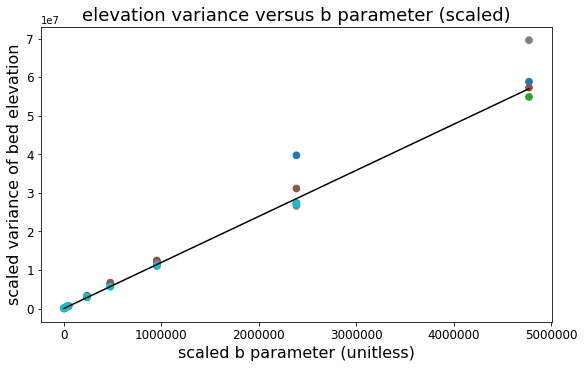

In [458]:
uni = np.unique(barr)
scales = np.where(uni.reshape(-1,1)==barr)[0] # scales to offset the data by to enhance visibility 
colors = [ord(f[0]) for f in files]
colors = np.array(colors)
colors = colors-colors.min()
colors = colors/colors.max()
plt.figure(figsize=(8,5),constrained_layout=True)
#plt.scatter(barr/z1, (var+scales*1500)/z1**2, c=colors,cmap='tab10',marker='o',s=45) # with the separating scales 
plt.scatter(barr/z1, var/z1**2, c=colors,cmap='tab10',marker='o',s=45)

#plt.loglog(b*z1**2,var,c=colors,cmap='tab10')
plt.xlabel('scaled b parameter (unitless)',fontsize=16)
plt.ylabel('scaled variance of bed elevation',fontsize=16)
plt.title('elevation variance versus b parameter (scaled)',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('../figures/scaled_var_vs_b')
plt.plot(b/z1, 1/4*b/z1**2 ,color='black') # so sig^2/z1^2 = b/(4*z1**2)



In [312]:
#ok, determine the slopes connecting the lines of each b value to the origin 
# first extract the data corresponding to each b value
index = np.digitize(barr,np.unique(barr))-1
var_arr = []
for i in range(9):
    if i!=8:
        var_arr.append(var[index==i])
    else:
        ele = np.array(list(var[index==i])+[None])
        var_arr.append(ele)
        del ele
    
var_arr = (np.array(var_arr)).T
##index = np.vstack(5*(index,))
#index2 = np.where(index.reshape(-1,1)==np.arange(5))[1]
#var_arr[index2]=var[index]
#for i in range(5):
#    var_arr[i] = var[index==i]
#    print(var[index==i])





In [ ]:
z

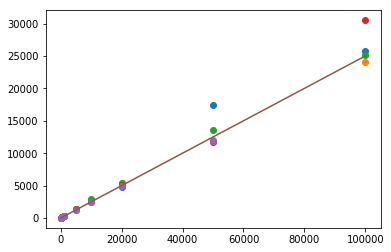

In [480]:
for v in var_arr:
    plt.plot(b,v,'o')
plt.plot(b,b/4) # so the data collapse around var(m)=b/4
# the proper way to write the rates is then lam*(1+z1*z/(4*l^2))

In [481]:
L = np.sqrt(b)/2.0*z1

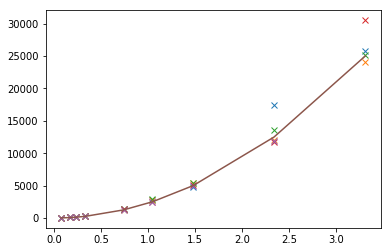

In [542]:
for v in var_arr:
    plt.plot(L,v,'x')
plt.plot(L,L**2/z1**2)

* essentially, you found that you really should have written the interaction terms as lamb(1+z1*z/(4*l^2))
* when you do this, you'll find var(m) = l^2/z1^2 and var(z) = l^2. 
* hence the problem is expressed in terms of more natural scales than b. 
* to calculate l from b, do l = z1/2*np.sqrt(b) 
* the essential connection is 4l^2/z1^2 = b
* it follows in terms of b that var(m) = b/4
* therefore in terms of l it follows that var(m) = 4l^2/z1^2/4 = l^2/z1^2
* and the key equation leading to this is that var(z)=z1^2 var(m) = l^2-- the defining equation for l, really
* in your simulations, l ranges from 0.07cm to 3.311cm
* likewise, L/z1 ranges from 3.53 to 158

In [4]:
328*

[3, 28, 53, 78, 103, 128, 153, 178, 203, 228, 253, 278, 303, 328]

In [494]:
# CONCLUSION
# b = 4*l^2/z1^2 in order to express it in terms of the length scale of bed fluctuations l 
# this follows from the observation that var(m) = b/4 so that z1**2*var(m) = z1**2*b/4 = l^2 
# with this substitution, var(m) = l^2 and var(z) = z1^2 l^2 

## study the mean activities and their variances

In [495]:
# get variance of m versus b for all trials 
mean_n = []
var_n = []
for f in files: 
    trial = f[0]
    number = int(f[2])-1
    S = np.load('../simulations/'+f)
    n = S.T[0]
    mean_n.append(n.mean())
    var_n.append(n.var())
    del n,S 

In [506]:
b = [50,250,500,1000,5000,10000,20000,50000,100000] # raw b values
barr = 5*b # b values correpsonding to each filename 
barr = barr[:-1] # last trial is missing
b = np.array(b)
bar = np.array(barr)
lar = np.sqrt(bar)*z1/2 # in terms of the length scale 

In [623]:
var_n = np.array(var_n)
mean_n = np.array(mean_n)

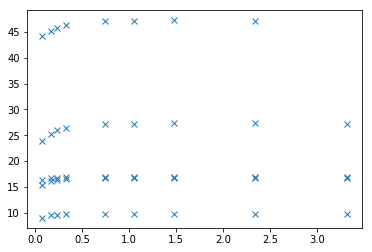

In [646]:
plt.plot(lar,mean_n,'x')

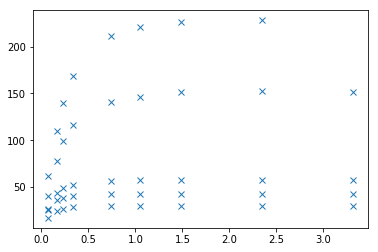

In [645]:
plt.plot(lar,var_n,'x')

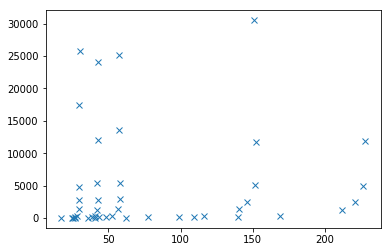

In [643]:
plt.plot(var_n,var,'x')

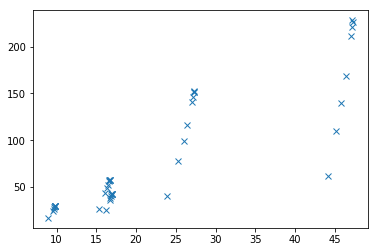

In [633]:
plt.plot(mean_n,var_n,'x')

ValueError: x and y must have same first dimension, but have shapes (45,) and (44,)

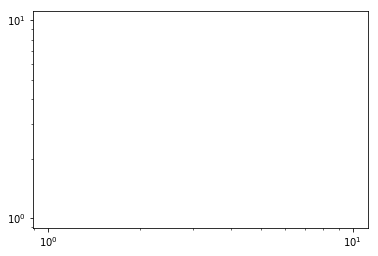

In [792]:
plt.loglog(lar/z1,var_n,'x') # clear indication the variance scales with l 
plt.xlabel(' l = z1/2*b**{1/2} the length scale of bed fluctuations')
plt.ylabel(' the variance of the number of active particles')

In [781]:
var = np.concatenate((var,np.array([np.nan])))

In [787]:
lar = np.concatenate((lar,np.array([np.nan])))

In [791]:
vary

array([[1.93361398e+01, 7.77655555e+01, 1.52601873e+02, 2.93177400e+02,
        1.44780719e+03, 2.84826167e+03, 4.84994265e+03, 1.74251089e+04,
        2.57929030e+04],
       [2.01695322e+01, 8.03354069e+01, 1.45379276e+02, 2.76957723e+02,
        1.25797577e+03, 2.73732288e+03, 5.41260926e+03, 1.19976798e+04,
        2.40618127e+04],
       [2.09975687e+01, 8.45710394e+01, 1.54713166e+02, 2.96156305e+02,
        1.38814318e+03, 2.94048147e+03, 5.46014303e+03, 1.36492060e+04,
        2.51210453e+04],
       [2.29139276e+01, 9.50089967e+01, 1.69244017e+02, 3.03571151e+02,
        1.33083043e+03, 2.50124151e+03, 5.10127227e+03, 1.16768795e+04,
        3.05148142e+04],
       [2.35229152e+01, 9.96914788e+01, 1.75570936e+02, 3.11322739e+02,
        1.29575746e+03, 2.47508096e+03, 4.86674004e+03, 1.19138277e+04,
                   nan]])

In [788]:
vary = var.reshape(5,9) # var[i] represents the ith parameter set 
lary = lar.reshape(5,9)

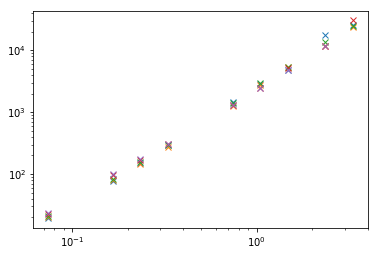

In [790]:
for v,l in zip(vary,lary):
    plt.loglog(l,v,'x')

In [692]:
vv = var_n[:9] # just take one set of data 

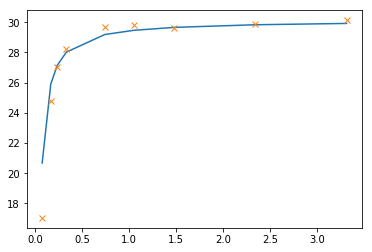

In [724]:
#plt.plot(1/ll,vv.max()-vv,'x')
plt.plot(ll,vv.max()-0.7/ll) # so here is the function which describes the variance gap variation with l 
plt.plot(ll,vv,'x')

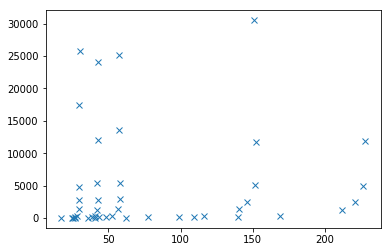

In [772]:
plt.plot(var_n,var,'x')

In [712]:
files[-1]

'n_8_output_100000_Ap.npy'

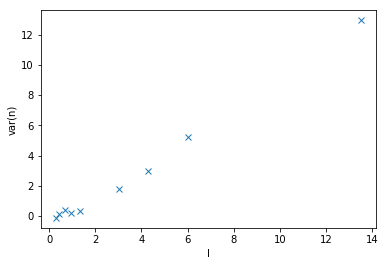

In [686]:
plt.plot(1/L,-var_n[:9]+30,'x')
plt.xlabel('l')
plt.ylabel('var(n)')
def curve(l,k):
    return 30*(1-np.exp(-l/k))

In [526]:
# now investigate the asymptotes of the variance

In [726]:
lar

array([0.07404805, 0.16557647, 0.23416049, 0.33115294, 0.74048049,
       1.04719755, 1.48096098, 2.34160491, 3.31152942, 0.07404805,
       0.16557647, 0.23416049, 0.33115294, 0.74048049, 1.04719755,
       1.48096098, 2.34160491, 3.31152942, 0.07404805, 0.16557647,
       0.23416049, 0.33115294, 0.74048049, 1.04719755, 1.48096098,
       2.34160491, 3.31152942, 0.07404805, 0.16557647, 0.23416049,
       0.33115294, 0.74048049, 1.04719755, 1.48096098, 2.34160491,
       3.31152942, 0.07404805, 0.16557647, 0.23416049, 0.33115294,
       0.74048049, 1.04719755, 1.48096098, 2.34160491])

In [727]:
tru = np.array(list(np.array(var_n)[np.where(lar==lar.max())[0]] ) + [var_n[-1]]) # a,d h,k

In [728]:
tru

array([ 30.13571576,  42.99252717,  57.59533941, 151.20078097,
       228.10038036])

In [729]:
tru # they all overshoot!~ So it enhances bedload variance at large l? ... no, doesn't make sense. 
# needs to have the proper scaling behavior 

array([ 30.13571576,  42.99252717,  57.59533941, 151.20078097,
       228.10038036])

In [733]:
test = np.array([22.5 , #these are the data of ancey2008.. variance of activity
                38.1,
                50.0,
                123.38,
                214.31])

In [737]:
np.abs((test-tru)/test)*100 # errors in variance asymptotes... fine I guess

array([33.93651449, 12.84127867, 15.19067881, 22.54885798,  6.43478156])


### regress the l_c for all experiments

In [749]:
vfin = test

In [746]:
lar[:9]

array([0.07404805, 0.16557647, 0.23416049, 0.33115294, 0.74048049,
       1.04719755, 1.48096098, 2.34160491, 3.31152942])

In [747]:
var_n[:9]

array([17.03747971, 24.79527839, 27.00966798, 28.22856961, 29.6679538 ,
       29.83052772, 29.5937347 , 29.90891512, 30.13571576])

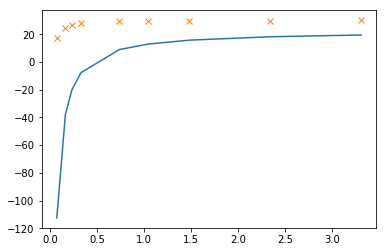

In [762]:
plt.plot(lar[:9],vfin[0]-10.0/lar[:9])
plt.plot(lar[:9],var_n[:9],'x')

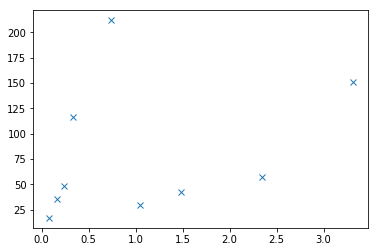

In [744]:
plt.plot(lar[::5],var_n[::5],'x')

In [740]:
L

array([0.07404805, 0.16557647, 0.23416049, 0.33115294, 0.74048049,
       1.04719755, 1.48096098, 2.34160491, 3.31152942])

In [ ]:
vfinity = test # the array of vfinity values


* first conclusion is mean values are perhaps slightly sensitive to l ... more study needed
* second conclusion is that variance values definitely shift with the elevation scale l. 
* smaller l means a more receptive and responsive bed which drives fluctuations in the activity down 
* larger l means a more inert bed which supports neg-bin fluctuations exactly as ancey2008 
* asymptotic variances are about 15 to 25 percent off of their expected values. Error is lower for intermediate variances where the simulations also look nicer. Presumably they are right, but require longer runs to resolve

There is an interesting idea here. Ancey 2008 said their most problematic mismatch between theory and experiment regarded the resting time distribution. Since their model does not take account of the mechanism we've outlined, that elevation fluctuations buffer particle activity fluctuations, to calibrate their model involves over-stating the deposition rate (because fluctuations of activity scale like entrain/(deposit + emigrate - collective), and the emigration rate is an experimental control, presumably their model was calibrated with extra emphasis in the wrong parameters in order to maximize the fit of the variance to the experimental data. It could be recalibrated to take account of bed elevation fluctuations and get a slightly less idealized Markov model of sediment transport.  

## determine conditional elevation distribution

In [540]:
M = S.T[1] # array of number of bed particles 
M = M-M.mean() # relative fluctuations
Z = z1*M/a # normalized deviation
T = S.T[2] # array of times 
_,bins = np.histogram(Z,23)
digits = np.digitize(Z,bins)-1 # find the bins for each element
Z=bins[digits] # digitize the array

NameError: name 'S' is not defined

In [ ]:
departures = []
arrivals = []
for k in range(len(bins)-1): 
    departures.append(np.where( ( Z[:-1] == bins[k] ) & ( Z[1:] == bins[k+1] ) )[0])
    arrivals.append(np.where( ( Z[1:] == bins[k] ) & (Z[:-1] == bins[k+1] ) )[0])
departures = np.array(departures)
arrivals = np.array(arrivals) 

In [ ]:
returns = []
for a,d in zip(arrivals,departures):
    if a[0]<d[0]:
        a=a[1:]
    if d[-1]>a[-1]:
        d=d[:-1]
    returns.append(T[a]-T[d])

In [ ]:
for t in returns:
    if len(t)>0:
        _ = plt.hist(t[t>120],bins=20)
        plt.show()
    